<a href="https://colab.research.google.com/github/luiz-star/Hands_on_Regressao/blob/main/Hands_on_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on Regressão**

---

Regressão com sklearn 

Vamos começar a analisar algoritmos de regressão de acordo com as métricas.

Para isso, usaremos 3 regressores diferentes. Todas as implementações são provenivientes do sklearn. São eles: 


*   <a href = http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html> Regressão Linear </a>
*   <a href = http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html>Support Vector Regressor (SVR)</a>
*   <a href = http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html> Random Forest Regressor </a>

Esses regressores são amplamente utilizados no dia-a-dia quando se trata de uma tarefa de regressão. Mais informações sobre esses modelos podem ser encontradas nos links para a documentação do sklearn. 

Vamos utilizar a base de dados **data-temp.csv** </a> que pode ser encontrada no Kaggle em: https://www.kaggle.com/ilayaraja97/temperature-data-seattle. Essa base descreve o problema de predizer a temperatura máxima dos próximos dias a partir das informações dos dias anteriores em Seatlle. 


### *Importando* bibliotecas


In [ ]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos

In [ ]:
#liberando acesso do colab aos arquivos no drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Carregamento dos dados

In [ ]:
#lendo o csv que contem a base de dados e armazanando em um df
df = pd.read_csv('/content/gdrive/My Drive/IGTI/Aulas Práticas/data-temps.csv')

In [ ]:
#imprimindo as 5 primeiras linhas do df para confirmação
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


*   year: ano de registro da temperatura
*   month: mês de registro da temperatura
*   day: dia de registro da temperatura
*   week: dia da semana em que a temperatura foi registrada
*   temp2: temperatura máxima obtida 2 dias antes do dia atual
*   temp1: temperatura máxima obtida 1 dia antes do dia atual
*   average: máxima média histórica
*   actual: temperatura máxima real
*   friend: previsão de um oráculo sobre a temperatura máxima


In [ ]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (348, 9)


In [ ]:
# Verificando quais são os tipos das features
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

### Pré processamento

Muitos modelos de regressão não são capazes de lidar com dados categóricos. Nesse caso, é preciso pré-processar alguns dados para que eles sejam entendidos pelo modelo. 

No nosso problema, a feature week é categórica. Dois dos modelos que vamos usar não lidam com esse tipo de dado. Nesse caso, precisamos transformar o atributo categórico **week** em um atributo numérico que não forneça pesos distintos para dias das semana distintos.

O processo que vamos utilizar se chama binarização, ou ainda One-Hot Encoding. 
O pandas possui a função <a href = https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html > get_dummies()</a> que faz essa transformação diretamente. 


In [ ]:
# binarizando a feature week
df = pd.get_dummies(df)

# visualizando o resultado
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


Uma outra etapa importante do pré-processamento consiste na avaliação de dados faltantes. 



In [ ]:
# Analisando o resumo da base
df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483,0.143678,0.140805,0.143678,0.140805,0.140805,0.149425,0.140805
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179,0.351268,0.348321,0.351268,0.348321,0.348321,0.357021,0.348321
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Particularmente, quando estamos falando de Regressão, é interessante avaliar a correlação entre os atributos da base de dados. Em geral, atributos com alta correlação com a variável que queremos prever são atributos que influenciam bastante no comportamento do modelo. 

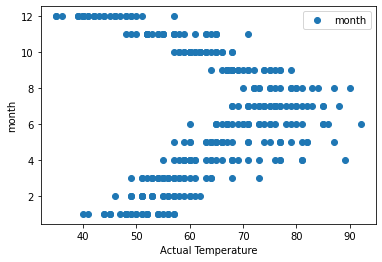

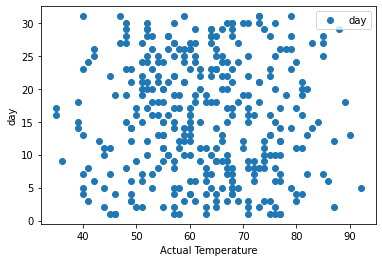

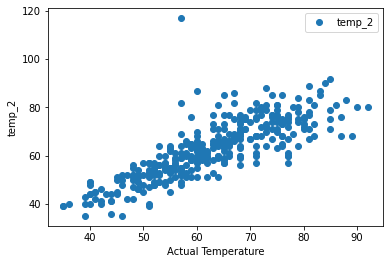

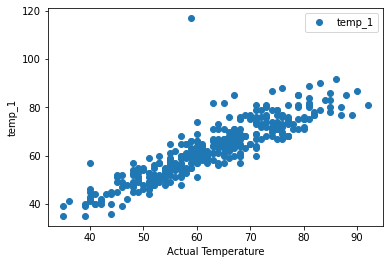

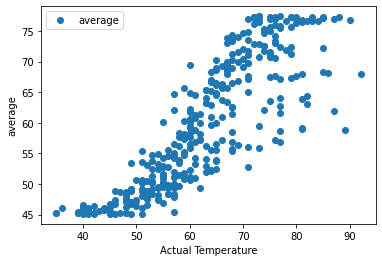

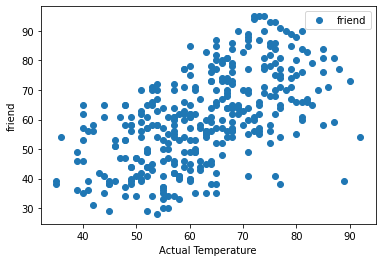

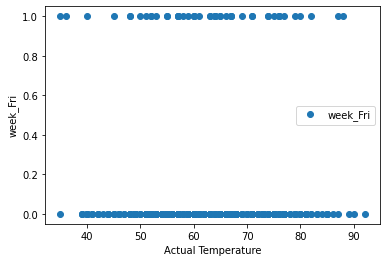

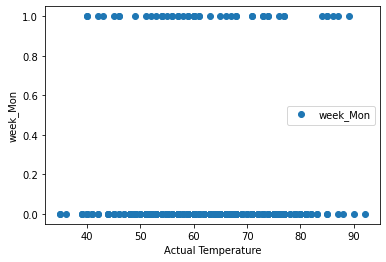

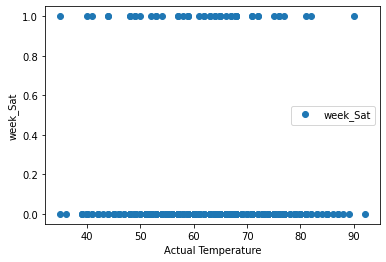

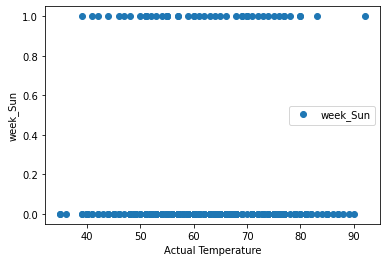

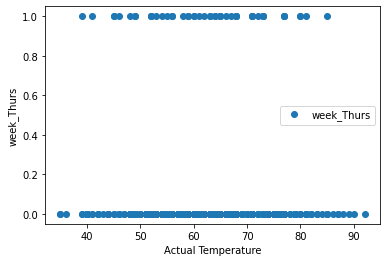

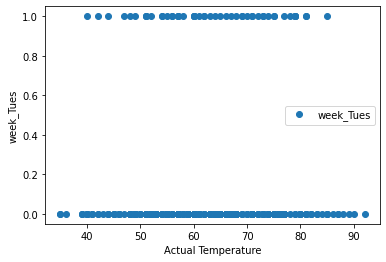

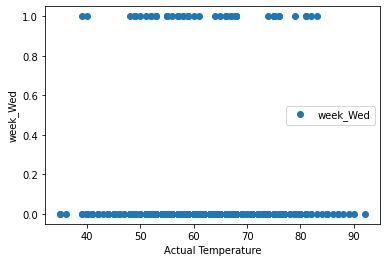

In [ ]:
#plotando gráficos de correlação das features
for i in df.columns[1:]:
    if(i != 'actual'):
        df.plot(x = 'actual', y = i, style='o') 
        plt.xlabel('Actual Temperature')  
        plt.ylabel(i) 
        plt.show()

Os modelos implementados no sklearn recebem como entrada para a modelagam um ou mais arrays. Dessa forma, precisamos modificar o df original para que seja possível a modelagem correta. 

Para isso, vamos separar o label das amotras, armazenar o nome das featues já que os arrays não fazem isso e depois retirar a coluna de labels do df original. Em seguida, vamos converter o df para array usando o numpy!

In [ ]:
# armazenando os labels em um array
labels = np.array(df['actual'])

# salvando a ordem das features
feature_list = list(df.columns)

In [ ]:
# removendo a coluna de labels do df original
df = df.drop('actual', axis = 1)

# check
df.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'friend',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'],
      dtype='object')

In [ ]:
# convertendo df para array
data = np.array(df)

Agora estamos quase prontos para a modelagem em si!

Precisamos apenas separar uma parte dos nossos dados para que seja possível avaliar os modelos que vamos treinar. O sklearn tem uma função para isso: <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html> train_test_split<a>.

In [ ]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

### Baseline: Comparando com a média!

Como falamos durante as aulas teóricas, precisamos criar uma base de comparação para os modelos que queremos avaliar. 

Várias medidas de erro apresentadas usam como baseline, isto é, uma linha de base, o modelo médio. Para o nosso problema, o baseline utilizado é a média máxima histórica. Podemos pensar que o modelo baseline é equivalente a prever a média máxima histórica para todos os dias do nosso conjunto de teste. 

Como essa média máxima é um atributo do nosso dataset, podemos apenas copiar a resposta desse atributo como resultado do modelo aplicado ao nosso conjunto de teste. 

In [ ]:
# criando baseline
baseline_preds = test_data[:, feature_list.index('average')]

O sklearn tem várias métricas implementadas! :D

Vamos testar essas metricas? 

In [ ]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('R2:', metrics.r2_score(test_labels, baseline_preds)) 
print('MSE:', metrics.mean_squared_error(test_labels, baseline_preds))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, baseline_preds))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, baseline_preds))) 
print('MAE:', metrics.mean_absolute_error(test_labels, baseline_preds))


R2: 0.6081589797570233
MSE: 54.4928735632184
RMSE: 7.381928851134939
RMSLE: 0.11221618980253842
MAE: 5.05977011494253


Algumas das medidas faladas em aula não estão implementadas no metrics do sklearn. 

Podemos criar a função que calula essas metricas! :)

In [ ]:
#criando a funcao para calculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('MAPE:', mean_absolute_percentage_error(test_labels, baseline_preds))


MAPE: 7.704879665543076


Agora que avaliamos nosso baseline e identificamos o erro desse modelo, podemos criar outros modelos de regressão e comparar os resultados encontrados!

Dica: Se não conseguirmos um erro menor do que o baseline, talvez precisemos repensar nossa abordagem.

Vamos dar uma olhada como ficou o nosso baseline em relação as amostras de teste?

*Não se preocupe em compreender o que foi realizado na célula a seguir, todas as manipulações foram realizadas no único intuito de gerar o gráfico.*

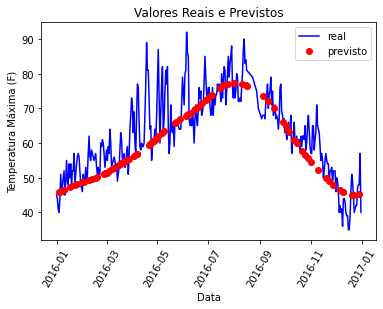

In [ ]:
# importar datetime para criação de objetos do tipo data para plotagem
import datetime

# datas do conjunto de treino
months = data[:, feature_list.index('month')]
days = data[:, feature_list.index('day')]
years = data[:, feature_list.index('year')]

# criar lista contendo os valores de dia, mês e ano unificados em formato de data
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# criar dataframe com valores de temperatura máxima real e datas de registro
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# datas do conjunto de teste
months = test_data[:, feature_list.index('month')]
days = test_data[:, feature_list.index('day')]
years = test_data[:, feature_list.index('year')]

# criar lista contendo os valores de dia, mês e ano unificados em formato de data
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# converter lista gerada anteriormente em objetos datetime
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]


# criar dataframe com valores previstos e datas de registro
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': baseline_preds})

# plotar os valores de temperatura reais
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'real')

# plotar os valores de temperatura previstos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'previsto')

plt.xticks(rotation = '60'); 
plt.legend()

# definição dos nomes dos eixos
plt.xlabel('Data');
plt.ylabel('Temperatura Máxima (F)'); 
plt.title('Valores Reais e Previstos');

# Regressão Linear

Vamos aplicar o primeiro modelo de regressão: a regressão linear!

In [ ]:
# importar o modelo de regressão linear
from sklearn.linear_model import LinearRegression 

# treinando o modelo no conjunto de dados de treino
regression = LinearRegression().fit(train_data, train_labels);

In [ ]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions1_labels = regression.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions1_labels})  
p.head(10)

,Real,Previsto
0,66,68.053603
1,61,62.714241
2,52,48.931776
3,66,61.809117
4,70,67.878007
5,82,68.909162
6,85,79.026256
7,84,80.498872
8,65,60.387689
9,92,73.925827


Agora que criamos o modelo de regressão linear e aplicamos o modelo criado ao conjunto de teste, podemos então avaliar o modelo gerado. 

In [ ]:
#avaliando o modelo
print('R2:', metrics.r2_score(test_labels, predictions1_labels)) 
print('MSE:', metrics.mean_squared_error(test_labels, predictions1_labels))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions1_labels))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, predictions1_labels))) 
print('MAE:', metrics.mean_absolute_error(test_labels, predictions1_labels))
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions1_labels))


R2: 0.8069774388842328
MSE: 26.84342239413264
RMSE: 5.181063828417156
RMSLE: 0.07811529163036064
MAE: 3.8275014537919656
MAPE: 6.011806129263038


**Uaaaaaaaaaaaaaaaaau!**

Uma simples regressão linear ja encontrou um erro bem menor do que o encontrado pelo nosso baseline! 

Vamos dar uma olhada como ficou a regressão linear em relação as amostras de teste?

*Novamente, não é preciso se preocupar com o código da célula abaixo. *

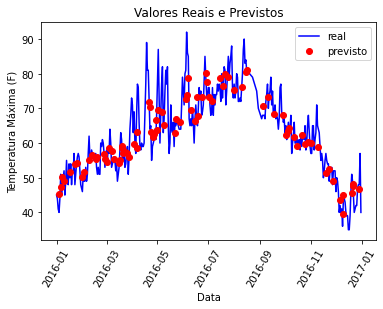

In [ ]:
# criar dataframe com valores previstos e datas de registro
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions1_labels})

# plotar os valores de temperatura reais
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'real')

# plotar os valores de temperatura previstos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'previsto')

plt.xticks(rotation = '60'); 
plt.legend()

# definição dos nomes dos eixos
plt.xlabel('Data');
plt.ylabel('Temperatura Máxima (F)'); 
plt.title('Valores Reais e Previstos');

# Support Vector Regressor SVR

Vamos dar uma olhada agora no comportamento do SVR

In [ ]:
#importar o modelo SVR
from sklearn.svm import SVR

# instanciacao e determinacao dos hiperparâmetros do SVR: tipo de kernel e epsilon
regression = SVR(kernel='rbf', epsilon=1.0)

# treinando o SVR
regression.fit(train_data,train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions2_labels = regression.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions2_labels})  
p.head(10)

,Real,Previsto
0,66,62.025961
1,61,61.989091
2,52,61.945076
3,66,61.995669
4,70,62.026022
5,82,62.064812
6,85,62.090959
7,84,62.097218
8,65,61.984746
9,92,62.052646


In [ ]:
#avaliando o modelo 
print('R2:', metrics.r2_score(test_labels, predictions2_labels)) 
print('MSE:', metrics.mean_squared_error(test_labels, predictions2_labels))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions2_labels))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, predictions2_labels))) 
print('MAE:', metrics.mean_absolute_error(test_labels, predictions2_labels))
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions2_labels))


R2: 0.00012649703504530319
MSE: 139.0512416043
RMSE: 11.791999050385817
RMSLE: 0.18671091932638212
MAE: 9.547606515768958
MAPE: 15.685787500492534


Vamos olhar como ficou o modelo? :)

*Novamente, não precisa se preocupar com o código abaixo.*

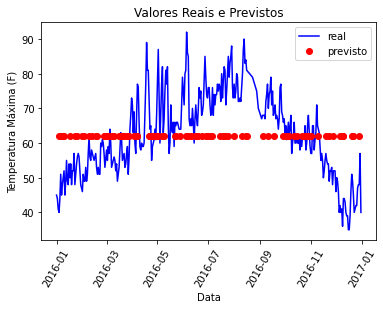

In [ ]:
# criar dataframe com valores previstos e datas de registro
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions2_labels})

# plotar os valores de temperatura reais
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'real')

# plotar os valores de temperatura previstos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'previsto')

plt.xticks(rotation = '60'); 
plt.legend()

# definição dos nomes dos eixos
plt.xlabel('Data');
plt.ylabel('Temperatura Máxima (F)'); 
plt.title('Valores Reais e Previstos');

# Random Forest Regressor


Vamos agora modelar o nosso problema utilizando o Random Forest Regressor!

Esse modelo é um dos mais utilizados tanto na sua versão de regressor quanto para sua versão de classificador e, em geral, apresenta otimos resultados!

In [ ]:
# importar o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# treinando o modelo 
regression = RandomForestRegressor(n_estimators= 10, random_state=42).fit(train_data, train_labels);

In [ ]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions3_labels = regression.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions3_labels})  
p.head(10)

,Real,Previsto
0,66,71.5
1,61,61.7
2,52,50.7
3,66,61.0
4,70,64.2
5,82,68.1
6,85,78.1
7,84,80.1
8,65,64.3
9,92,73.4


In [ ]:
#avaliando o modelo
print('R2:', metrics.r2_score(test_labels, predictions3_labels)) 
print('MSE:', metrics.mean_squared_error(test_labels, predictions3_labels))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions3_labels))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, predictions3_labels))) 
print('MAE:', metrics.mean_absolute_error(test_labels, predictions3_labels))
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions3_labels))

R2: 0.7826272833674706
MSE: 30.229770114942525
RMSE: 5.498160611963107
RMSLE: 0.08430660941594086
MAE: 4.30919540229885
MAPE: 6.75604632349625


Vamos olhar como ficou o modelo? :)

*Novamente, não precisa se preocupar com o código abaixo.*

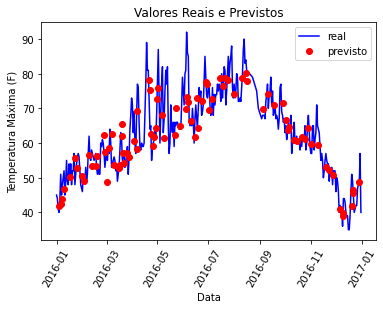

In [ ]:
# criar dataframe com valores previstos e datas de registro
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions3_labels})

# plotar os valores de temperatura reais
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'real')

# plotar os valores de temperatura previstos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'previsto')

plt.xticks(rotation = '60'); 
plt.legend()

# definição dos nomes dos eixos
plt.xlabel('Data');
plt.ylabel('Temperatura Máxima (F)'); 
plt.title('Valores Reais e Previstos');

Vamos agora comparar os resultados do 3 modelos de regressão e o nosso baseline?

In [ ]:
print('Erros do Baseline')
print('MSE:', metrics.mean_squared_error(test_labels, baseline_preds))  
print('MAPE:', mean_absolute_percentage_error(test_labels, baseline_preds))

Erros do Baseline
MSE: 54.4928735632184
MAPE: 7.704879665543076


In [ ]:
print('Erros da Regressão Linear')
print('MSE:', metrics.mean_squared_error(test_labels, predictions1_labels))  
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions1_labels))

Erros da Regressão Linear
MSE: 26.84342239413264
MAPE: 6.011806129263038


In [ ]:
print('Erros do SVR')
print('MSE:', metrics.mean_squared_error(test_labels, predictions2_labels))  
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions2_labels))

Erros do SVR
MSE: 139.0512416043
MAPE: 15.685787500492534


In [ ]:
print('Erros do Random Forest Regressor')
print('MSE:', metrics.mean_squared_error(test_labels, predictions3_labels))  
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions3_labels))

Erros do Random Forest Regressor
MSE: 30.229770114942525
MAPE: 6.75604632349625
